## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

In [8]:
df = pd.read_csv('Data/titanic.csv').drop('Unnamed: 0', 1)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Identificando valores nulos**

In [17]:
pd.DataFrame(round(df.isnull().sum()/len(df)*100,2)).rename(columns={0:'Valores nulos'})

,Valores nulos
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [34]:
round(df[df['Sex'] == 'female']['Survived'].sum()/len(df[df['Sex'] == 'female'])*100, 2)

74.2

In [35]:
round(df[df['Sex'] == 'male']['Survived'].sum()/len(df[df['Sex'] == 'male'])*100, 2)

18.89

In [54]:
x = df['Sex']
y = df['Survived']

C:\Users\jmart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


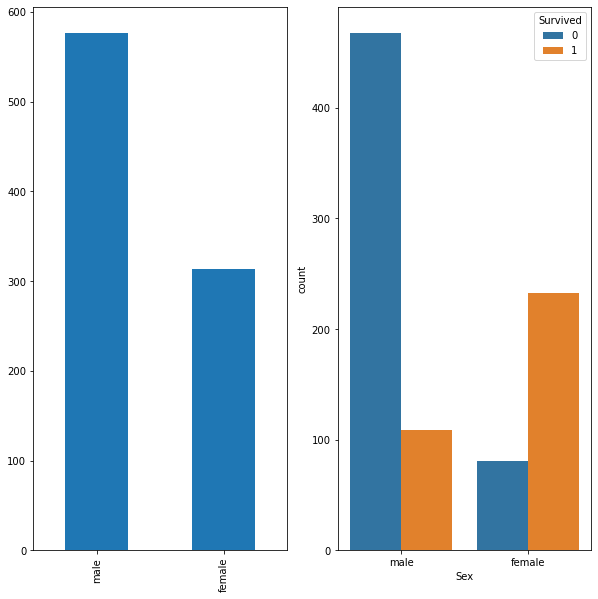

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
x.value_counts().plot.bar(ax=ax[0])
sns.countplot(x, hue=y, ax=ax[1])
plt.show()